# Project: Investigate a Dataset - [No-Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>    In this project we will be analysing the data about the No-Show dataset which has information from a 100K medical
    appointments in brazil .
    
>    our main concern here is whether the patient showed up or not and the data we collected here is going to help us 
    predict if a certain patient is more likely to show up to their appointment or not.
    
    
    
#### we collected different kinds of data like the following :
    
>    *ScheduledDay : which tells us what day the patient set as his appointment .
    
>    *AppointmentDay : this has the data about The day of the actuall appointment.
    
>    *AppointmentID and PatientId : they contain the identification of the patient and the appointment .
    
>    *Gender and Age : they contains whether the patient was a male or a female and the age of the patient,
    this can he us see if older patients are more likely to show up or the opposite and who is more likely to
    show up men or women ?
    
>    *Neighbourhood : this is the location in which the hospital is in .
    
>    *Scholarship : this column means whether this person was in the Brasilian welfare program, simply it's a program 
    to support poor family and provide help and medical care to them .
    
>    *Hipertension,Diabetes,Alcoholism and Handicap : they tell us if the person has any of those Diseases, diability
    or a certain addiction and those columns are actually very important as many people suffer from at least one of
    those diseases and will help us find if any of those make a person go to the appointment or whether having more
    than one make the person more likely to show up .
    
>    *SMS received : which mean how many messages has been sent to the patient and it's also important as we can use it
    to decide whether sending more messages and notifications to the person will incourage them to show up or not
    
>   *No-show : this is the most important data as the entire project will be working around it
     NOTE THIS if the entrie is 'No' then the patient showed up and 'Yes' if he didn't .

### Question(s) for Analysis

>    Their is mainly one question we are gonna adress in our analysis, which is what factors are important in our
    analysis and how do they affect whether the person will show up or not .
    
    
    
#### Their are some questions which comes after this, like for example :
    
>    * How is age related to the showing up or not and are older persons more likely to show up or is the opposite ?
    
>    * what about having a Scholarship ? is this a motivation for the person to show up and not waste it ?
    
>    * does having a certain disease, disabilite or an addiction make the patients show up ? what about having more  
    than one at the same time, is this by anyway related to going to the appointment or no ?
    
>    * are their certain Appointment Days which people are more likley to show up ? 
    
     
     
#### We will adress those question in our analysis and find relations between them and the no-show data and also try to compare between the data of the ones who showed up and the ones who didn't

In [32]:
# first here we will import all the packages and magic words we are going to use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# we use the matplotlib magic keyword to make visualizations appear here on our cells
% matplotlib inline

In [33]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> The data is already gathered so their is no need for this step,
    so before cleaning we will be assessing the data and taking a look around it and find the messy parts and our 
    data after that we will fix those parts or modifiy it to suit our analysis the best .
    
> We will be walking step by step with you and help clarifying it as far as we can .


In [34]:
# First we are going to load the data here and print the first 5 rows .
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [35]:
# here we are going to take a look at the data type of the columns, their names or any missing values .
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [36]:
df.isnull().sum().any()

False

In [37]:
# what about the age of the patient ? 
# we will treat all the <18 of age entries as their parients who signed up but is their any negative values ?
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [38]:
# let's grab it's index while we are here
index_wrong_entrie = df[df['Age'] < 0].index[0]

### Result
> The data appears to have no missing values at all which is a good start but both ScheduledDay and AppointmentDay 
    needs to be in datetime format which we will do in the next step .

> also the 'No-show' column entries sounds confusing but we will leave it as the the no in the name helps clarify it
    a little, we will just change it from 'No-show' to 'No_Show' .
    
> also we will need to drop the negative value from the dataset .


### Data Cleaning

> The first thing we are going to address is the datetime format and how we can change it .

> the datetime format in which our two columns is weird and we can't change is using the pd.to_datetime()
    without specifying the format ourselves .
    you can find the format i used or get more info about it from [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) .

In [39]:
# we will start by changing the 'ScheduledDay' column and see the result.
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], format = '%Y-%m-%d %H:%M:%S')
df['ScheduledDay'].dt.day_name().head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: ScheduledDay, dtype: object

In [40]:
# perfect!, it worked so we need to also change the 'AppointmentDay'.
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], format = '%Y-%m-%d %H:%M:%S')
df['AppointmentDay'].dt.day_name().head()

0    Friday
1    Friday
2    Friday
3    Friday
4    Friday
Name: AppointmentDay, dtype: object

In [41]:
# Now we will drop the row entrie with the -1 age
df.drop(index_wrong_entrie, axis = 0, inplace = True)

In [42]:
df[df['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [43]:
# now with the last step we will be changing 'no-show' column name
df.rename({'No-show':'No_Show'}, axis='columns', inplace = True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null datetime64[ns, UTC]
AppointmentDay    110526 non-null datetime64[ns, UTC]
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hipertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No_Show           110526 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 12.6+ MB


### Result
> Perfect!, 
    Now the data is trimmed and cleaned, their are no missing values no incorrect data types and the names
    of the columns are fine.
    
> Next we will be moving to EDA
    

<a id='eda'></a>
## Exploratory Data Analysis

> Here we will answer the question mentioned above and draw relation between variables using visualizations . 


### Research Question 1 (The important factors and how do they affect our data)
> Their are many question which we can adress under our first main question, but we will start with the ones
    we mention above .
    
> The first question we would like to adress is the age and whether is's related to patients showing up or not .


In [45]:
# first we will groupby the "No_Show" column and see it's info .
df_grouped = df.groupby('No_Show')
df_grouped['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
No_Show,,,,,,,,
No,88207.0,37.790504,23.338645,0.0,18.0,38.0,56.0,115.0
Yes,22319.0,34.317667,21.965941,0.0,16.0,33.0,51.0,115.0


In [46]:
# let's move the yes and no to different dataframes
yes_df = df[df['No_Show']=='Yes']
no_df = df[df['No_Show']=='No'] 

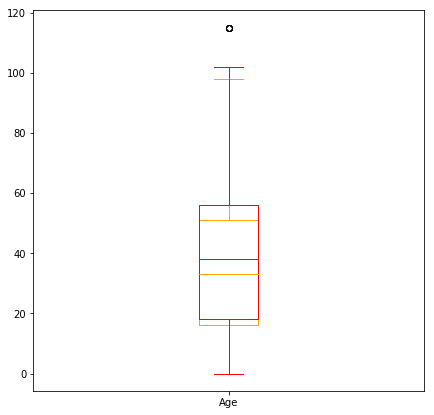

In [47]:
# now let's plot the Age in both of the DataFrames 
yes_df['Age'].plot(kind = 'box', figsize = (7, 7), color= 'orange');
no_df['Age'].plot(kind = 'box', figsize = (7, 7), color = 'red');

> we can find here that older patient are more likely to not show up though the difference is not huge

#### the second question is about the Scholarship and it's a simple one .


In [48]:
# let's see whether the patients with a Scholarship showed up or not 
filt_yes = df['Scholarship']==1
filt_no = df['Scholarship']==0
df[filt_yes]['No_Show'].value_counts()

No     8283
Yes    2578
Name: No_Show, dtype: int64

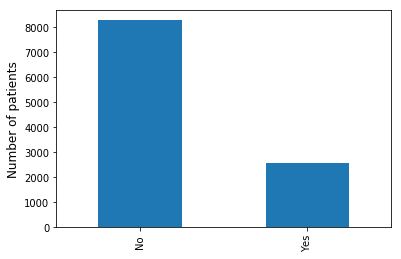

In [49]:
# let's see a visualization for it
df[filt_yes]['No_Show'].value_counts().plot(kind='bar');
plt.ylabel('Number of patients', fontsize=12);

> So most of the poeple who has a Scholarship didn't show up and almost only one quarter of them did

#### Now the third question is about the patients with a diseases, handicap or an addiction (bad habits). 

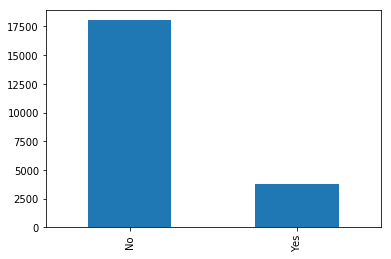

In [50]:
# now we will make a visualization for each of the 4 columns
# the Hipertension
df[df['Hipertension']== 1]['No_Show'].value_counts().plot(kind='bar');

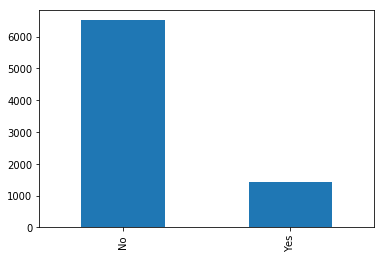

In [51]:
# the Diabetes
df[df['Diabetes']== 1]['No_Show'].value_counts().plot(kind='bar');

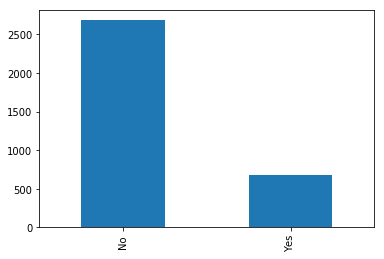

In [52]:
# the Alcoholism
df[df['Alcoholism']== 1]['No_Show'].value_counts().plot(kind='bar');

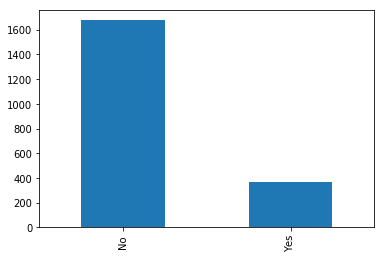

In [53]:
# and lastly the Handcap
df[df['Handcap']== 1]['No_Show'].value_counts().plot(kind='bar');

> So people who have certain medical conditions are more likely to not show up,
what about having more than one ? 

In [54]:
# we will create a new column to have the combined data 
df['Combined'] = df['Hipertension'] +df['Diabetes'] +df['Alcoholism'] +df['Handcap']
df['Combined'].value_counts()

0    84114
1    18014
2     7710
3      624
4       63
5        1
Name: Combined, dtype: int64

> Their is and entrie of 5 so let's check it out

In [55]:
df[df['Combined'] == 5]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_Show,Combined
5424,1.647280e+12,5647342,M,2016-05-02 13:24:36+00:00,2016-05-04 00:00:00+00:00,65,SANTO ANDRÉ,0,1,1,1,2,0,Yes,5


> he appears to have 2 handicaps so though me might be an outlier to our data or be strange but he won't mess our analysis up

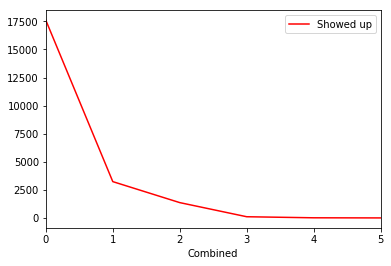

In [56]:
# now let's process by creating a visualization for the people who has more than one disease
df_grouped['Combined'].value_counts().loc['Yes'].plot(color='red', label = 'Showed up');
plt.legend();

> It also appears that the more diseases the patient has the more likely not to show up 

#### Now the last question let's see if their are certain Appointment Days which people are more likley to show up

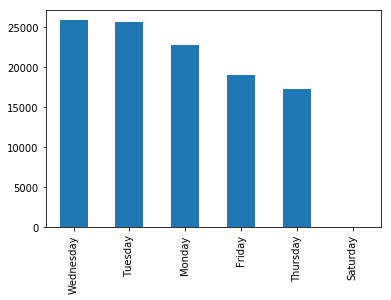

In [57]:
# let's first see what is the most popular appointment day
df['AppointmentDay'].dt.day_name().value_counts().plot(kind = 'bar');

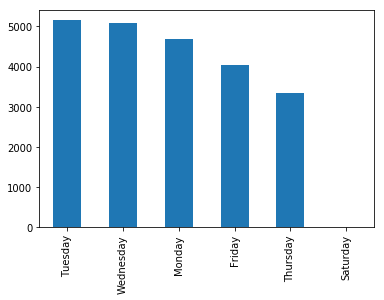

In [58]:
# it appears to be wednesday now let's see the most popular day amond those who showed up
yes_df['AppointmentDay'].dt.day_name().value_counts().plot(kind = 'bar');


> It appears that most of the appointments who show up come in tuesday, and though it's not 0 but almost no one comes at saturday

>before we end let's check who came more men or women

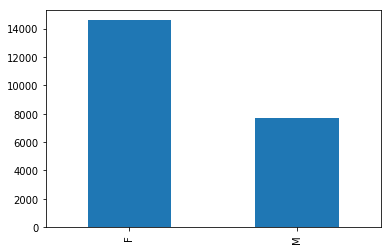

In [59]:
yes_df['Gender'].value_counts().plot(kind = 'bar');

> It appears women are more likely to show up they are almost double the men who showed up .

> But what about sms messages ? 

In [60]:
# first get the number of both who recieved and those who didn't in separate variables .
recieved = df_grouped['SMS_received'].value_counts().loc['Yes'].loc[1]
no_recieved = df_grouped['SMS_received'].value_counts().loc['Yes'].loc[0]

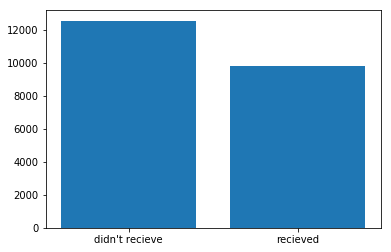

In [61]:
plt.bar(['recieved', 'didn\'t recieve'], [recieved, no_recieved]);

> Their is a huge part of those who showed up who revieved an SMS

### Result :
> We found somethings which may be helpful in identifing who is more likely to show up or not and we are going to discuss them and the limitions on the analysis in the next step


<a id='conclusions'></a>
## Conclusions
#### Findings :
> The first thing i found is older people are more likely not to show up, it's not by a huge age gap but still.

> The second thing is people with  Scholerships are more likely to not show up and almost a quarter of those who has one only showed up 

> the third thing is people with Hipertension, Diabetes ,Alcoholism or a Handcap are more likely to not show up, and this scales with the number of the diseases as if the more a person has diseases the more likely to not show up .

> the forth thing is almost no one shows up on saturday and most of those who shows up shows on tuesday and wednesday.

> most of the people who didn't show up are females .

> and lastly a huge portion of those who showed up has recieved an SMS message .

#### Limitations :
> The limitation i found on our dataset is the time part of the datetime column in the Appointment day dataset as both the hours, minutes and seconds are 0 and we can't decides which hour people showed up the most, we can't decide whichhour people didn't show up the most and the time in the ScheduledDay column isn't enough to help us accomplish that .


In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0